In [1]:
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import gsw

In [2]:
sd = 3 # Sill depth
file1 = xr.open_dataset('/Users/weiyangbao/Documents/Model_outputs/NoTide/state_' + str(format(sd,'03d')) + '.nc')
state1 = file1.isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40)) # Remove the boundary walls and the shelf region
file2 = xr.open_dataset('/Users/weiyangbao/Documents/Model_outputs/qf-tide/state_' + str(format(sd,'03d')) + '.nc')
state2 = file2.isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40)) # Remove the boundary walls and the shelf region
file3 = xr.open_dataset('/Users/weiyangbao/Documents/Model_outputs/shelf-tide/state_' + str(format(sd,'03d')) + '.nc')
state3 = file3.isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40)) # Remove the boundary walls and the shelf region
    
x = state1.X.data / 1000 # x coornidate in km
z = state1.Z.data
pres = gsw.p_from_z(z, 0)
p = np.tile(pres,[len(x),1]).T


# NoTide data
pt1 = state1.Temp.data.mean(axis=(0,2)) # Dimesions Z X
s1 = state1.S.data.mean(axis=(0,2))
rho1 = gsw.rho(s1, pt1, p)
u1_0 = 0.5 * (state1.U.data[:, :, :, 1:] + state1.U.data[:, :, :, :-1])
u1 = u1_0.mean(axis=(0,2))
w1 = state1.W.data.mean(axis=(0,2))
mask1 = (pt1 == 0)
pt1[mask1] = np.nan
s1[mask1] = np.nan
u1[mask1] = np.nan
w1[mask1] = np.nan
rho1[mask1] = np.nan

# qf-tide data
pt2 = state2.Temp.data.mean(axis=(0,2)) # Dimesions Z X
s2 = state2.S.data.mean(axis=(0,2))
rho2 = gsw.rho(s2, pt2, p)
u2_0 = 0.5 * (state2.U.data[:, :, :, 1:] + state2.U.data[:, :, :, :-1])
u2 = u2_0.mean(axis=(0,2))
w2 = state2.W.data.mean(axis=(0,2))
mask2 = (pt2 == 0)
pt2[mask2] = np.nan
s2[mask2] = np.nan
u2[mask2] = np.nan
w2[mask2] = np.nan
rho2[mask2] = np.nan

# shelf-tide data
pt3 = state3.Temp.data.mean(axis=(0,2)) # Dimesions Z X
s3 = state3.S.data.mean(axis=(0,2))
rho3 = gsw.rho(s3, pt3, p)
u3_0 = 0.5 * (state3.U.data[:, :, :, 1:] + state3.U.data[:, :, :, :-1])
u3 = u3_0.mean(axis=(0,2))
w3 = state3.W.data.mean(axis=(0,2))
mask3 = (pt3 == 0)
pt3[mask3] = np.nan
s3[mask3] = np.nan
u3[mask3] = np.nan
w3[mask3] = np.nan

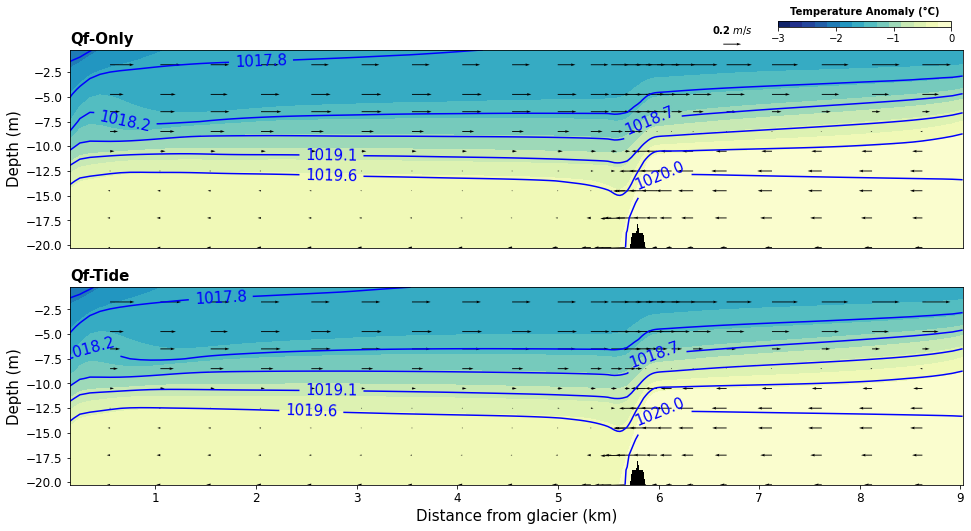

In [3]:
fig_path = "/Users/weiyangbao/Documents/Results_Figs/Af_compare/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
    
fig = plt.figure(figsize=(16,8))
fig.tight_layout()

ct = np.linspace(-3,0,15) # Contour range for temperature
crho = np.linspace(1016,1020,10)
cmap = 'YlGnBu_r'
pt0 = 9 # Initial temperature

# NoTide Plot
ax1 = fig.add_subplot(211)
im1 = ax1.contourf(x,z[:24],pt1[:24,:]-pt0, ct, cmap=cmap)
ax1.xaxis.set_visible(False)
ax1.set_xlim([x[1],x[-1]])
ax1.set_facecolor('k')

cbaxes = fig.add_axes([0.74, 0.92, 0.15, 0.01])
cbar = fig.colorbar(im1,cax=cbaxes, orientation='horizontal')
cbar.set_ticks([-3, -2, -1, 0])
cbar.ax.set_title('Temperature Anomaly (\N{DEGREE SIGN}C)', size=10, weight='bold')
# Plot isopycnals
CS1 = ax1.contour(x,z[:24],rho1[:24,:],crho, colors = 'b')
plt.clabel(CS1, fmt='%1.1f', fontsize=15, inline=1)
ax1.set_ylabel('Depth (m)', size=15)
ax1.tick_params(labelsize=12)
ax1.set_title('Qf-Only', loc='left', size=15, weight='bold')

u1[[1,2,4,5,7,8,10,12,14,16,18,20,22,24,26,28], :] = np.nan
w1[[1,2,4,5,7,8,10,12,14,16,18,20,22,24,26,28], :] = np.nan
u1[::2,:] = np.nan
w1[::2,:] = np.nan   
Q = ax1.quiver(x[::5],z[:24],0.1*u1[:24,::5], 0.1*w1[:24,::5], width=0.001, scale=1)
ax1.quiverkey(Q, 0.7, 0.89, 0.02,r'0.2 $m/s$', fontproperties={'weight': 'bold', 'size' : 10}, coordinates='figure')



# qf-tide Plot
ax2 = fig.add_subplot(212)
im2 = ax2.contourf(x,z[:24],pt2[:24,:]-pt0, ct, cmap=cmap)
ax2.set_xlim([x[1],x[-1]])
ax2.set_facecolor('k')
CS2 = ax2.contour(x,z[:24],rho2[:24,:],crho, colors = 'b')
plt.clabel(CS2, fmt='%1.1f', fontsize=15, inline=1)
ax2.set_ylabel('Depth (m)', size=15)
ax2.tick_params(labelsize=12)
ax2.set_title('Qf-Tide', loc='left', size=15, weight='bold')

u2[[1,2,4,5,7,8,10,12,14,16,18,20,22,24,26,28], :] = np.nan
w2[[1,2,4,5,7,8,10,12,14,16,18,20,22,24,26,28], :] = np.nan
u2[::2,:] = np.nan
w2[::2,:] = np.nan   
ax2.quiver(x[::5],z[:24],0.1*u2[:24,::5], 0.1*w2[:24,::5], width=0.001, scale=1)



# shelf-tide Plot
#ax3 = fig.add_subplot(313)
#im3 = ax3.contourf(x,z[:24],pt3[:24,:]-pt0, ct, cmap=cmap)
#ax3.xaxis.set_visible(False)
#ax3.set_xlim([x[1],x[-1]])
#ax3.set_facecolor('k')
#CS3 = ax3.contour(x,z[:24],rho3[:24,:],crho, colors = 'gray')
#plt.clabel(CS3, fmt='%1.1f', fontsize=15, inline=1)
#ax3.set_ylabel('Depth (m)', size=15)
#ax3.tick_params(labelsize=12)
#ax3.set_title('Tide-Only', loc='left', size=15, weight='bold')
ax2.set_xlabel('Distance from glacier (km)', size=15)
ax2.tick_params(labelsize=12)
fig.savefig(fig_path + '/Hs018.png', dpi = 200, bbox_inches='tight')